In [1]:
import pandas as pd
import glob, os
import seaborn as sns; sns.set()
%matplotlib inline 
import matplotlib.pyplot as plt

infolder="/Users/irffanalahi/Research/Research_update/SM/ShowcaseSM/BL19_V2/forfig/myversion/BL19v2metin_out_mincpg2_q0.5_addedcol_q1e-05_maxCompartmentwisedelta-0.6"
celllist=['CD4','em4','cm4','Tr','CD8','cm8','em8','ed8','nB','cB','mB','NK','Mn','Macs','mNeu','DC','Eo','Mg','Er']


In [2]:
files = glob.glob(infolder+'/*.txt')
key = {next((s for s in files if v in s), None): i for i, v in enumerate(celllist)}
files=sorted(files, key=key.get)
#files

In [3]:
filesdf=[pd.read_csv(fp,sep="\t") for fp in files]

In [4]:
df_combined = pd.concat(filesdf, axis=0)
df_combined.head()

,chrom,start,end,q,diff,#cpg,p(MWU),p(2dks),Tr,others,...,Er-cm8,Er-em8,Er-DC,Er-Eo,Er-Tr,Er-em4,Er-ed8,Er-Mg,Er-cm4,Er-mB
0,chr2,203835818,203836695,2.232700e-21,-0.716784,22,4.463100e-14,6.261000e-27,0.215480,0.93226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,chr1,40824701,40824919,3.078000e-06,-0.758951,5,1.013100e-10,2.311200e-09,0.970500,0.89268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr10,14734921,14735091,1.469400e-06,-0.751962,4,7.039700e-09,9.502600e-10,0.933250,0.92505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr11,2702831,2703082,8.868000e-13,-0.801087,8,4.651800e-14,1.014200e-16,0.887813,0.86842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr12,113171836,113171916,3.271400e-11,-0.880407,7,6.128400e-14,5.197400e-15,0.980286,0.94817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_combined = df_combined[df_combined.columns.drop(list(df_combined.filter(regex='-')))]
df_combined.head()

,chrom,start,end,q,diff,#cpg,p(MWU),p(2dks),Tr,others,...,mycpgcount,maxCompartmentwisedelta,minCompartmentwiseDelta,nB.1,NK.1,mNeu.1,DC.1,Eo.1,Mg.1,Er.1
0,chr2,203835818,203836695,2.232700e-21,-0.716784,22,4.463100e-14,6.261000e-27,0.215480,0.93226,...,22,-0.650906,-0.760732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,chr1,40824701,40824919,3.078000e-06,-0.758951,5,1.013100e-10,2.311200e-09,0.970500,0.89268,...,5,-0.633870,-0.845137,0.133733,NaN,NaN,NaN,NaN,NaN,NaN
1,chr10,14734921,14735091,1.469400e-06,-0.751962,4,7.039700e-09,9.502600e-10,0.933250,0.92505,...,4,-0.629920,-0.796587,0.173083,NaN,NaN,NaN,NaN,NaN,NaN
2,chr11,2702831,2703082,8.868000e-13,-0.801087,8,4.651800e-14,1.014200e-16,0.887813,0.86842,...,8,-0.636104,-0.875542,0.067333,NaN,NaN,NaN,NaN,NaN,NaN
3,chr12,113171836,113171916,3.271400e-11,-0.880407,7,6.128400e-14,5.197400e-15,0.980286,0.94817,...,7,-0.703381,-0.915476,0.067762,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_combined.columns

Index(['chrom', 'start', 'end', 'q', 'diff', '#cpg', 'p(MWU)', 'p(2dks)', 'Tr',
       'others', 'CD4', 'CD8', 'nB', 'NK', 'Mn', 'Macs', 'mNeu', 'cB', 'cm8',
       'em8', 'DC', 'Eo', 'Tr.1', 'em4', 'ed8', 'Mg', 'cm4', 'Er', 'mB',
       'mycpgcount', 'maxCompartmentwisedelta', 'minCompartmentwiseDelta',
       'nB.1', 'NK.1', 'mNeu.1', 'DC.1', 'Eo.1', 'Mg.1', 'Er.1'],
      dtype='object')

In [7]:
(df_combined[df_combined['em4'].isnull()]).shape

(0, 39)

In [8]:
len(celllist)

19

In [9]:
poscols = ['chrom', 'start', 'end']
outdf=df_combined[poscols+celllist]


#df['combined'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [10]:
outdf.head()

,chrom,start,end,CD4,em4,cm4,Tr,CD8,cm8,em8,...,cB,mB,NK,Mn,Macs,mNeu,DC,Eo,Mg,Er
0,chr2,203835818,203836695,0.939061,0.899841,0.866386,0.215480,0.938273,0.923795,0.900614,...,0.891076,0.938295,0.953500,0.976212,0.952530,0.947894,0.958894,0.931318,0.925227,0.880500
0,chr1,40824701,40824919,0.978867,0.943000,0.939000,0.970500,0.975733,0.946500,0.927400,...,0.790100,0.802400,0.923267,0.848600,0.858467,0.767600,0.821200,0.881600,0.916600,0.920200
1,chr10,14734921,14735091,0.965917,0.929125,0.933750,0.933250,0.969667,0.932625,0.936875,...,0.803000,0.808375,0.965250,0.961167,0.937500,0.959417,0.936000,0.907500,0.940000,0.848750
2,chr11,2702831,2703082,0.942875,0.870250,0.899250,0.887813,0.886292,0.897250,0.843687,...,0.708792,0.703437,0.811125,0.931750,0.924125,0.899792,0.915708,0.887625,0.896250,0.865187
3,chr12,113171836,113171916,0.975333,0.979214,0.965000,0.980286,0.965810,0.970571,0.960929,...,0.801667,0.771143,0.959143,0.969333,0.983238,0.962143,0.943667,0.969071,0.976214,0.969500


In [11]:
outdf=outdf.copy()
outdf['position']=outdf[poscols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
outdf=outdf.drop(poscols, axis=1)

outdf=outdf.set_index('position')
outdf.head()

,CD4,em4,cm4,Tr,CD8,cm8,em8,ed8,nB,cB,mB,NK,Mn,Macs,mNeu,DC,Eo,Mg,Er
position,,,,,,,,,,,,,,,,,,,
chr2_203835818_203836695,0.939061,0.899841,0.866386,0.215480,0.938273,0.923795,0.900614,0.925295,0.965636,0.891076,0.938295,0.953500,0.976212,0.952530,0.947894,0.958894,0.931318,0.925227,0.880500
chr1_40824701_40824919,0.978867,0.943000,0.939000,0.970500,0.975733,0.946500,0.927400,0.946100,0.133730,0.790100,0.802400,0.923267,0.848600,0.858467,0.767600,0.821200,0.881600,0.916600,0.920200
chr10_14734921_14735091,0.965917,0.929125,0.933750,0.933250,0.969667,0.932625,0.936875,0.933875,0.173080,0.803000,0.808375,0.965250,0.961167,0.937500,0.959417,0.936000,0.907500,0.940000,0.848750
chr11_2702831_2703082,0.942875,0.870250,0.899250,0.887813,0.886292,0.897250,0.843687,0.823813,0.067333,0.708792,0.703437,0.811125,0.931750,0.924125,0.899792,0.915708,0.887625,0.896250,0.865187
chr12_113171836_113171916,0.975333,0.979214,0.965000,0.980286,0.965810,0.970571,0.960929,0.977286,0.067762,0.801667,0.771143,0.959143,0.969333,0.983238,0.962143,0.943667,0.969071,0.976214,0.969500


In [12]:
outdf.shape

(591, 19)

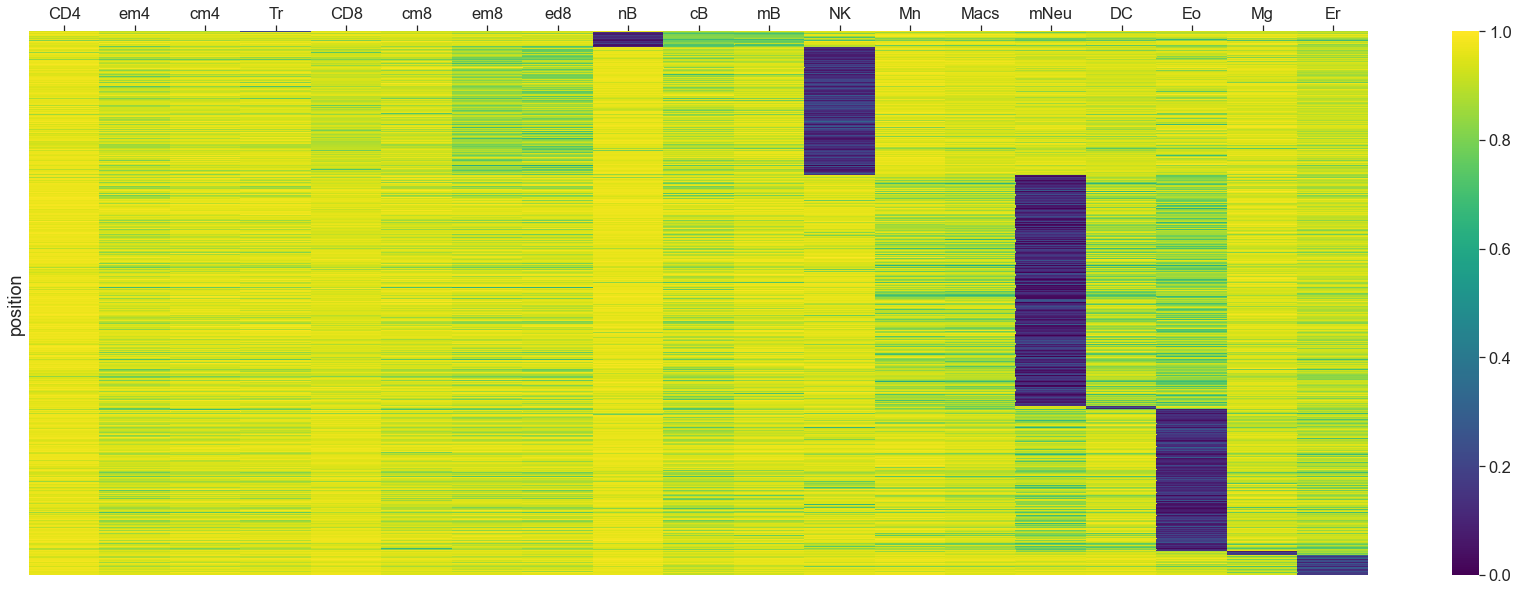

In [16]:
sns.set(font_scale=1.5)
plt.figure(figsize=(30,10))
mycmap = plt.cm.viridis
mycmap.set_bad("dimgrey")
aaa=sns.heatmap(outdf, cmap=mycmap,vmin=0, vmax=1, yticklabels=False)
aaa.xaxis.tick_top() # x axis on top

heatname=infolder+"_heat"+".pdf"
plt.savefig(heatname,bbox_inches = "tight")
plt.show()